Imports

In [1]:
import sys
import os

repo_root = "/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/"
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

import psp

In [41]:
# Reload the package
import sys
# Remove the main package if it's in sys.modules
if 'psp' in sys.modules:
    del sys.modules['psp']

# Remove any submodules of psp
for mod in list(sys.modules.keys()):
    if mod.startswith('psp.'):
        del sys.modules[mod]
import psp

## Initial data quality control and cleaning

Reading 10x matrix data...
... reading from cache file cache/tscc-projects-ps-malilab-ydoctor-KOLF_Perturbation_Atlas-KOLF_Perturbation_Atlas_Analysis-input_files-anndata_objects-filtered_matrix_mex-matrix.h5ad


/tscc/nfs/home/ydoctor/miniconda3/envs/perturb_seq_env/lib/python3.12/site-packages/anndata/utils.py:264: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SPATA13-1', 'SPATA13-2', 'SPATA13-3', 'MKKS-1', 'MKKS-2']
/tscc/nfs/home/ydoctor/miniconda3/envs/perturb_seq_env/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
/tscc/nfs/home/ydoctor/miniconda3/envs/perturb_seq_env/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 

Number of cells detected: 5386783
Unique gRNA perturbed genes detected: 11691
Average gRNA detected per gene: 3.00
Total GEX UMIs: 36,899,684,352.0
Total CRISPR UMIs: 193,396,656.0
Total cells detected: 5386783
Total genes detected: 38606
Total gRNAs detected: 35989
Total NTC gRNAs detected: 947
Average GEX UMIs per cell: 6,850.04
Average CRISPR UMIs per cell: 35.90
Assigning protospacers...


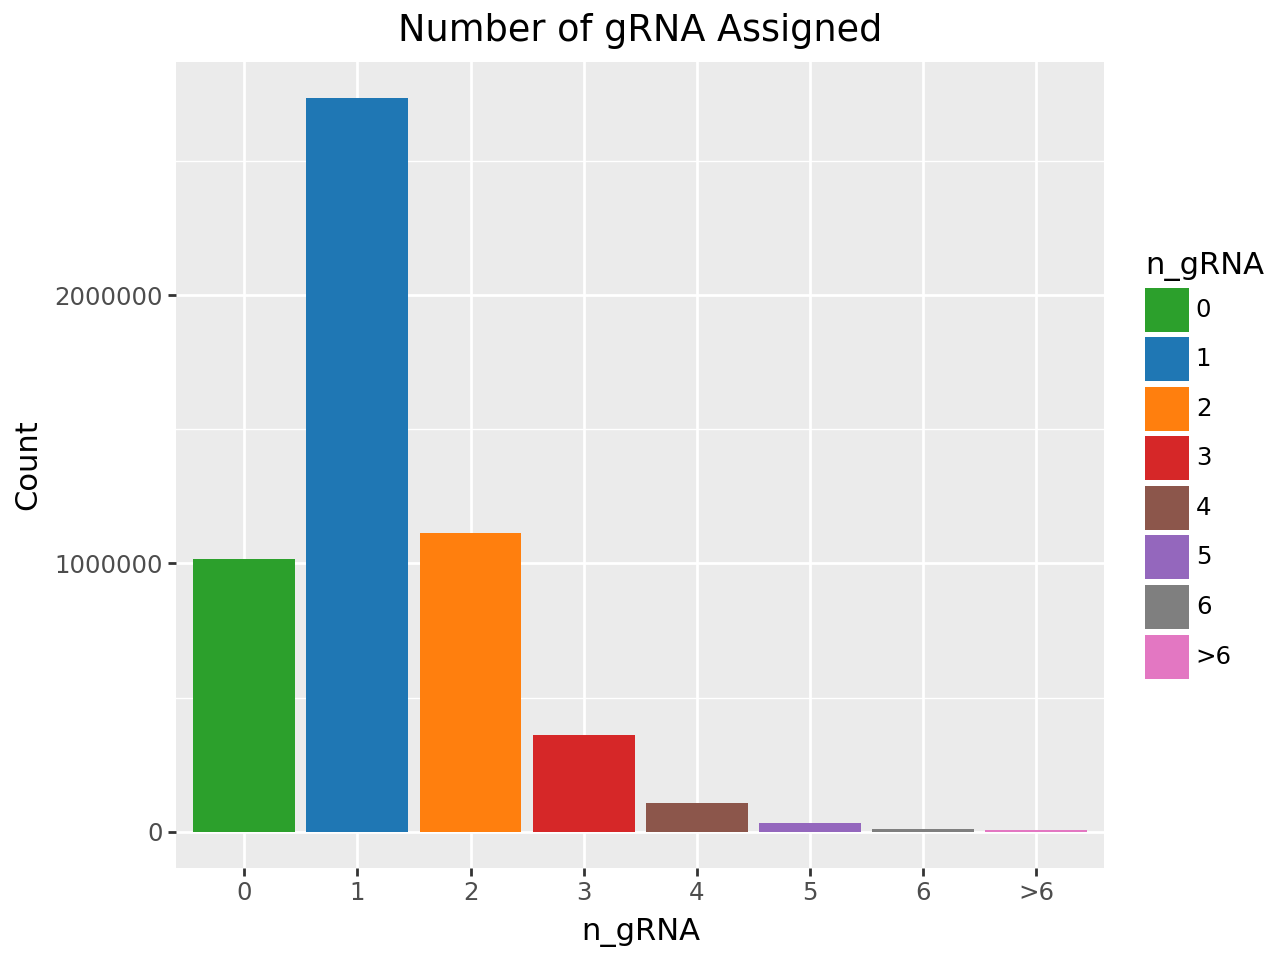

Cells without confident sgRNA calls: 18.89%
Estimated Multiplet Rate: 30.33%


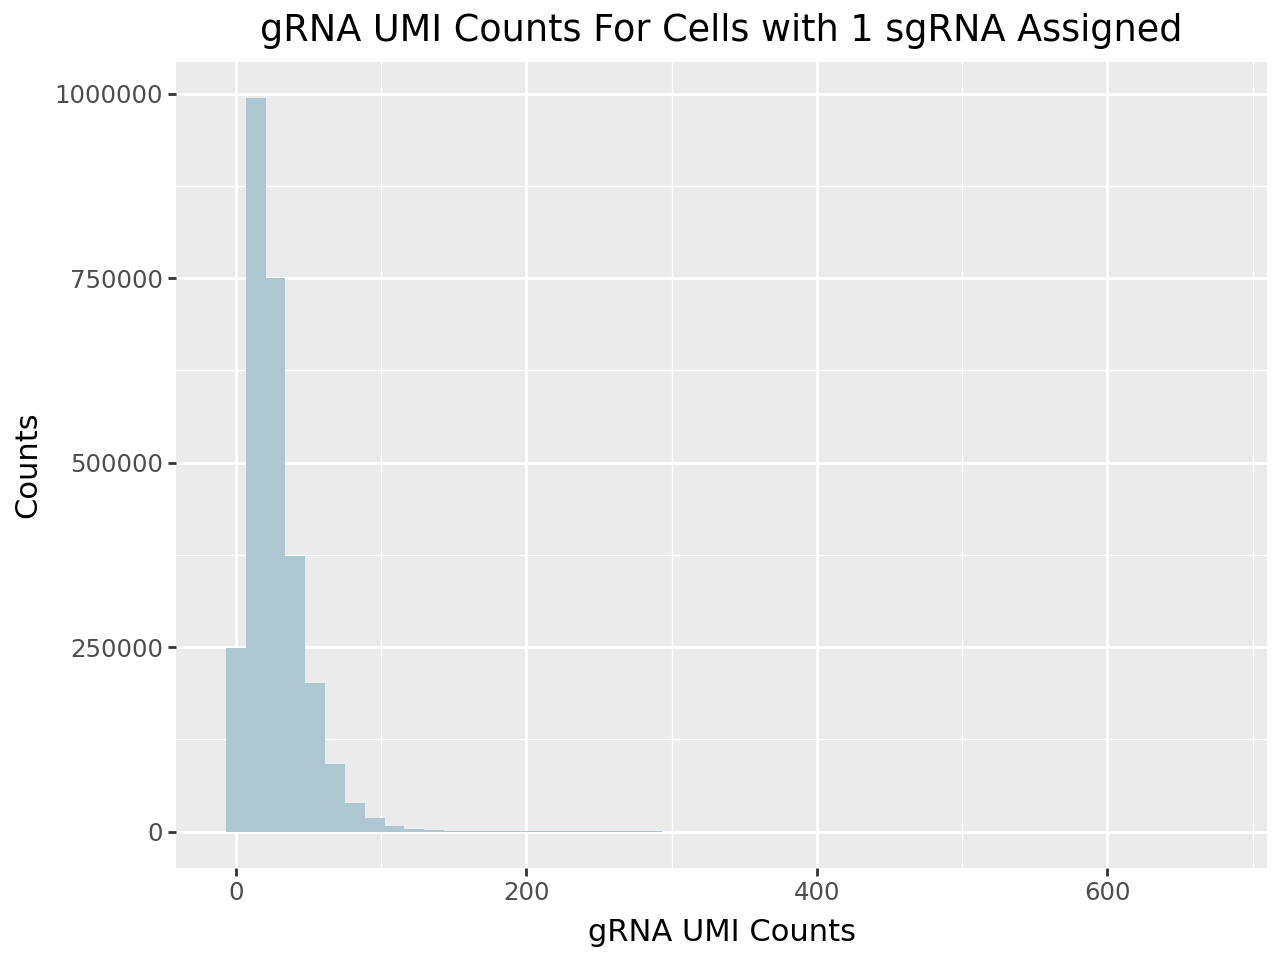

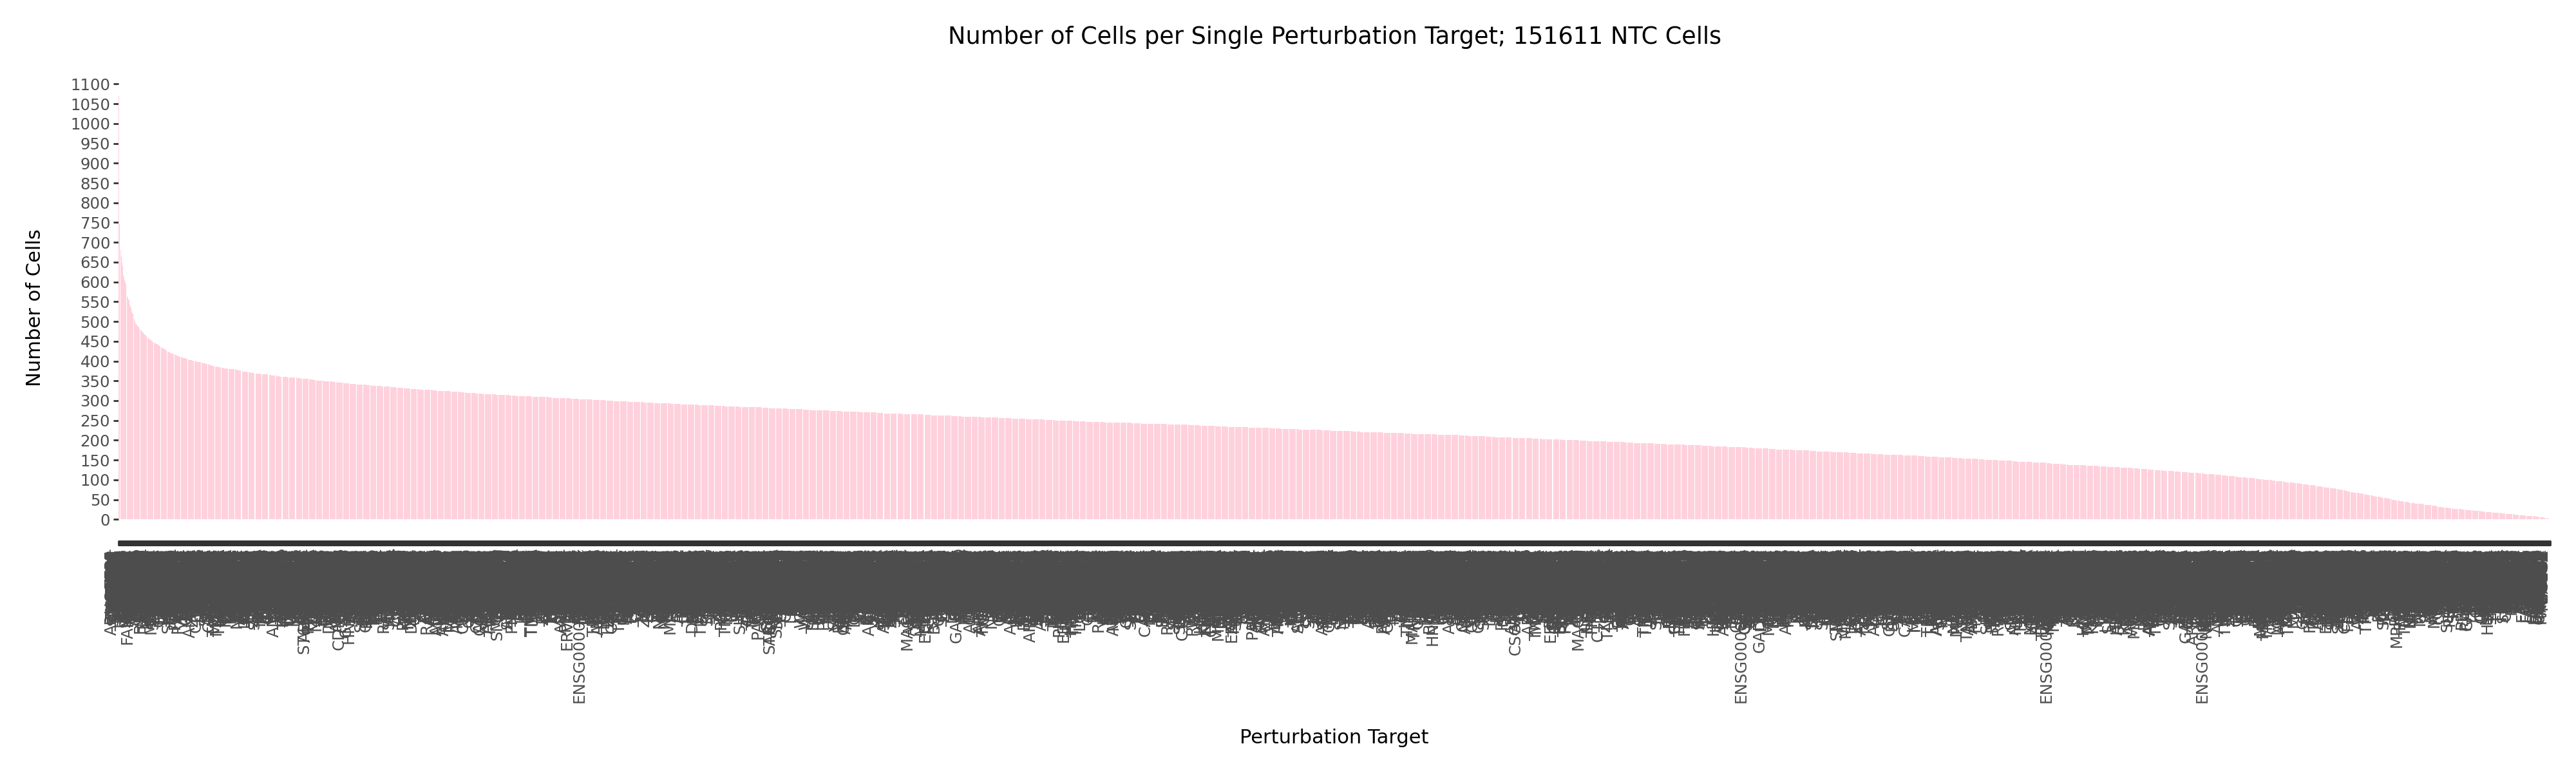

Number of perturbations with >= 50 cells with single guide assigned: 10933/11687 (93.55%)
Creating channel dictionary...
Assigning metadata...


/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/psp/qc/quality_control.py:346: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


Saving pre-QC data to /tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/input_files/anndata_objects/KOLF_Pan_Genome_Pre_QC.h5mu...
Performing general QC...
normalizing counts per cell
    finished (0:03:15)


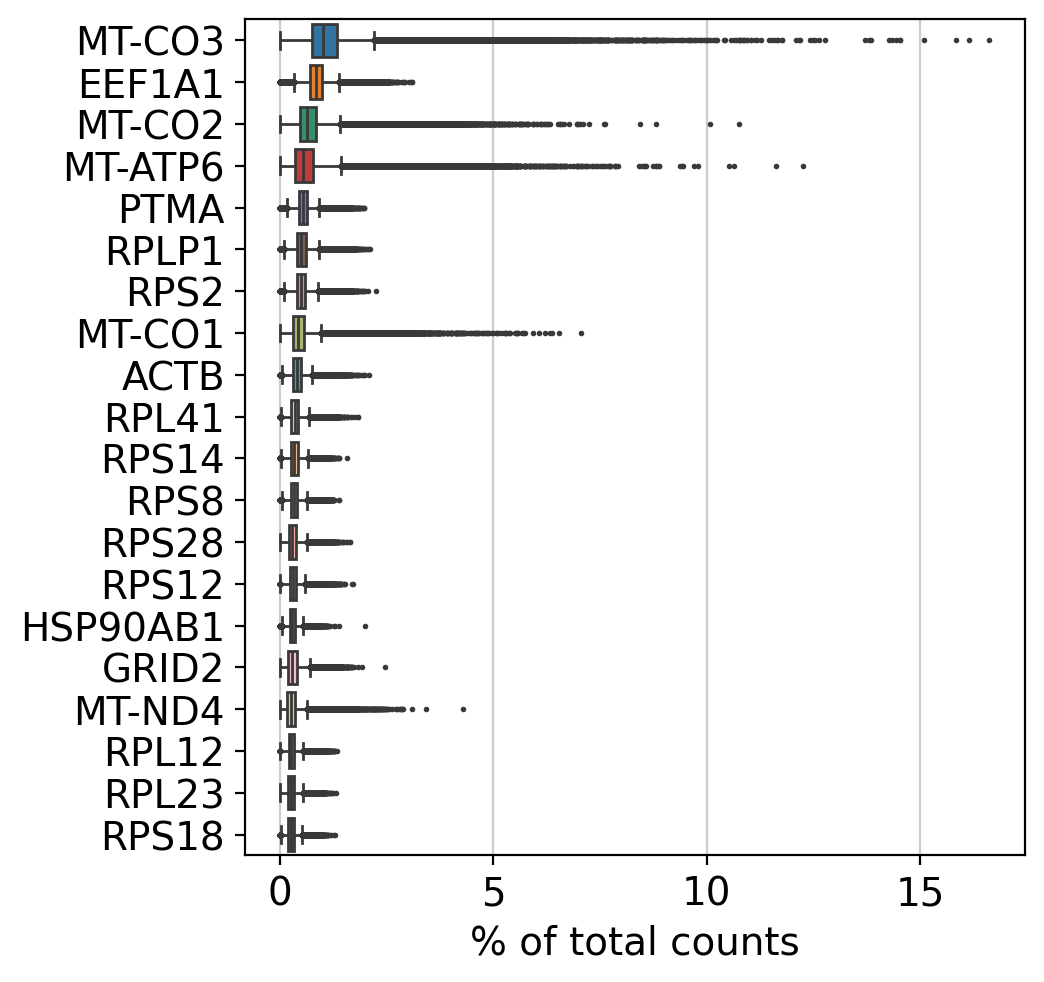

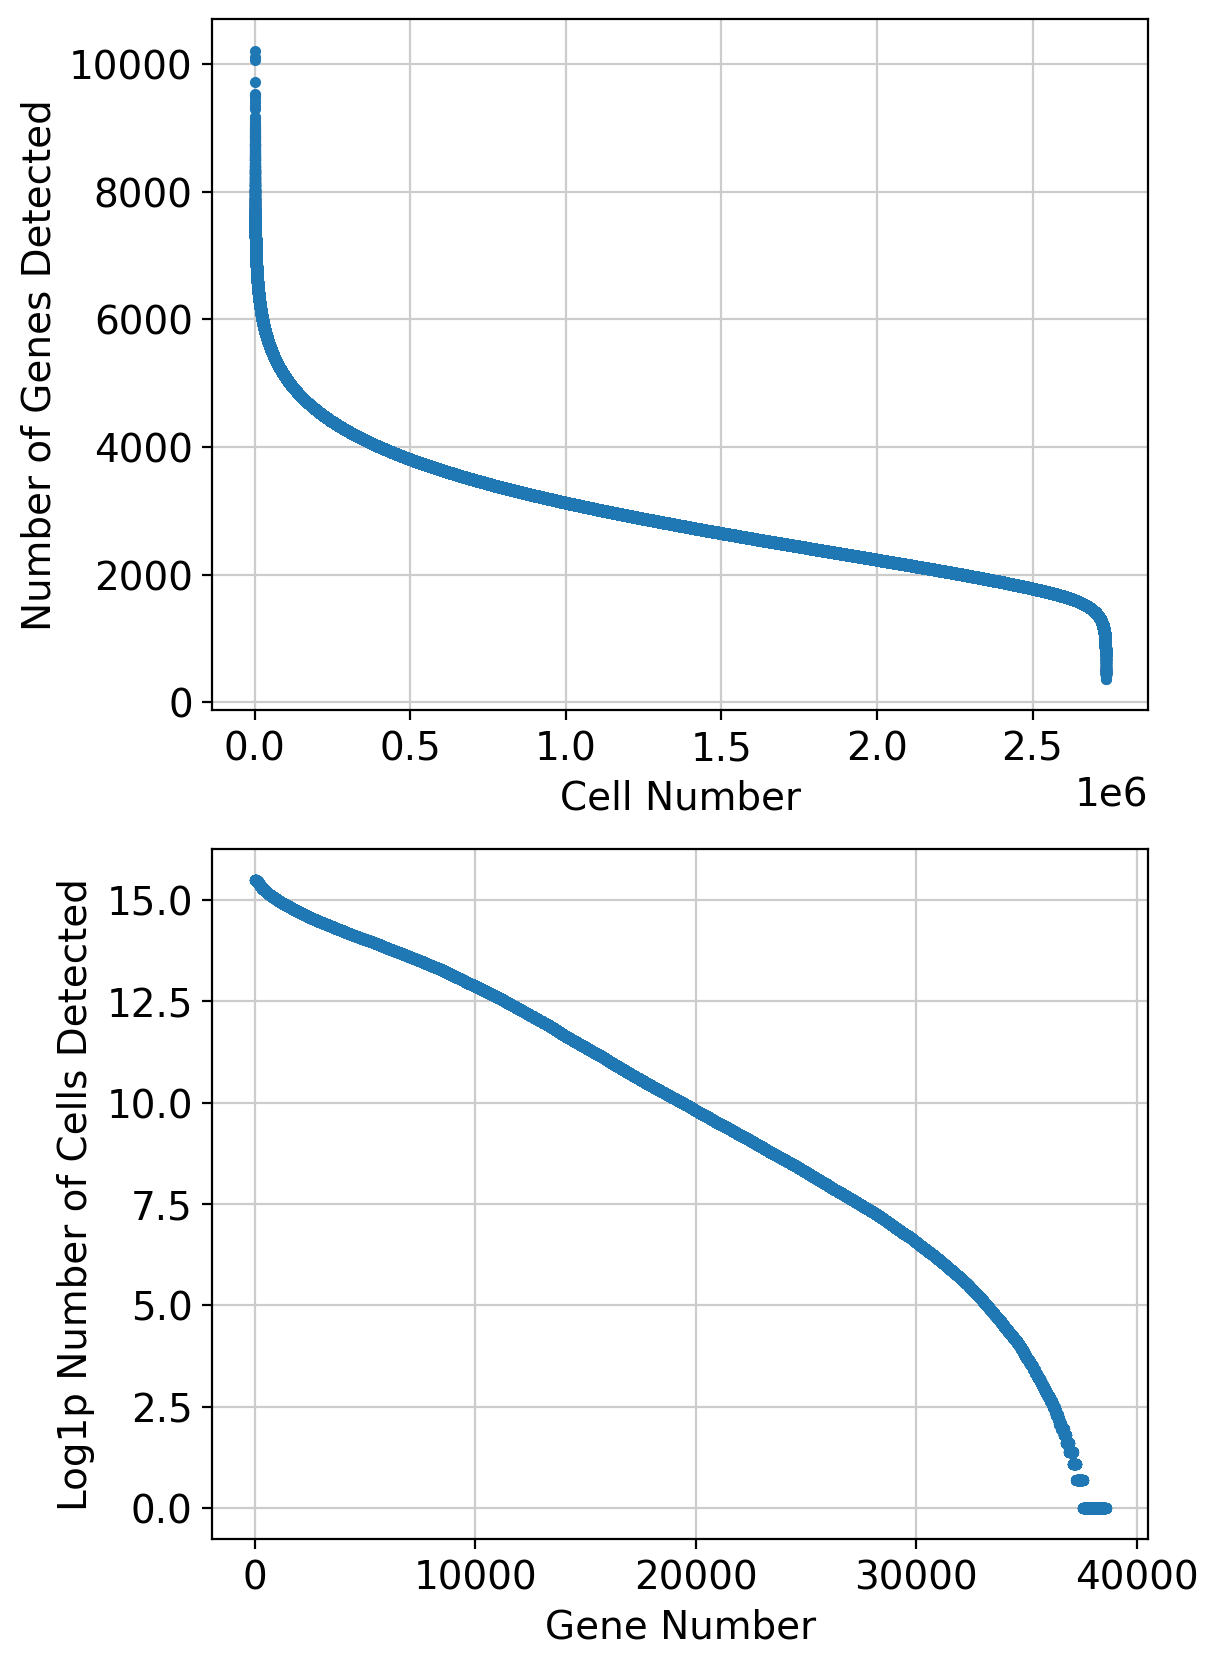

Removing 1039 genes not detected in any cells.
Performing dead cell QC...


/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/psp/qc/quality_control.py:427: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.


outlier
False    2663490
True       71960
Name: count, dtype: int64

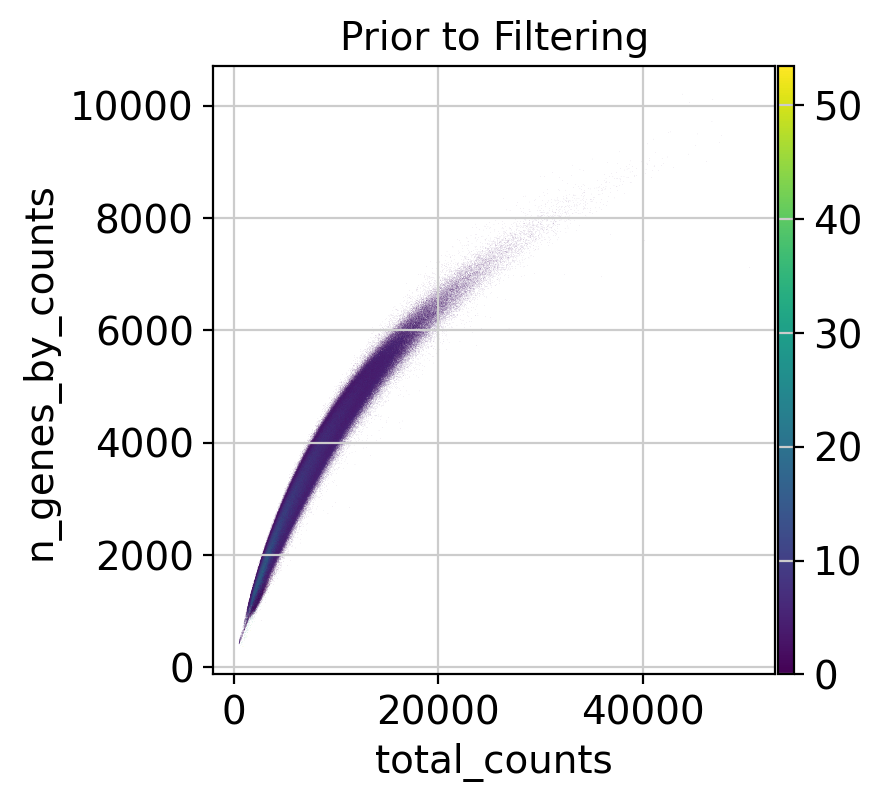

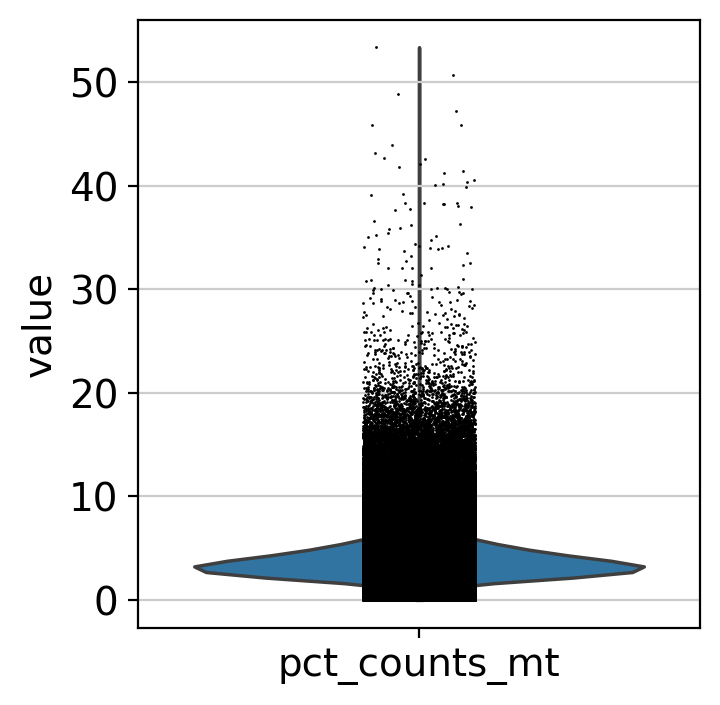

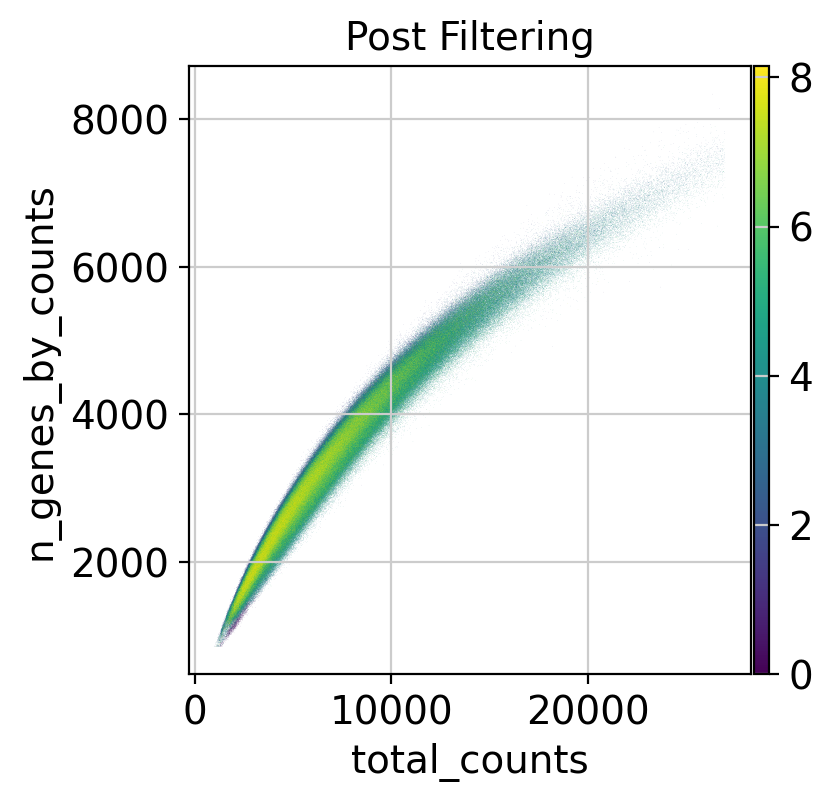

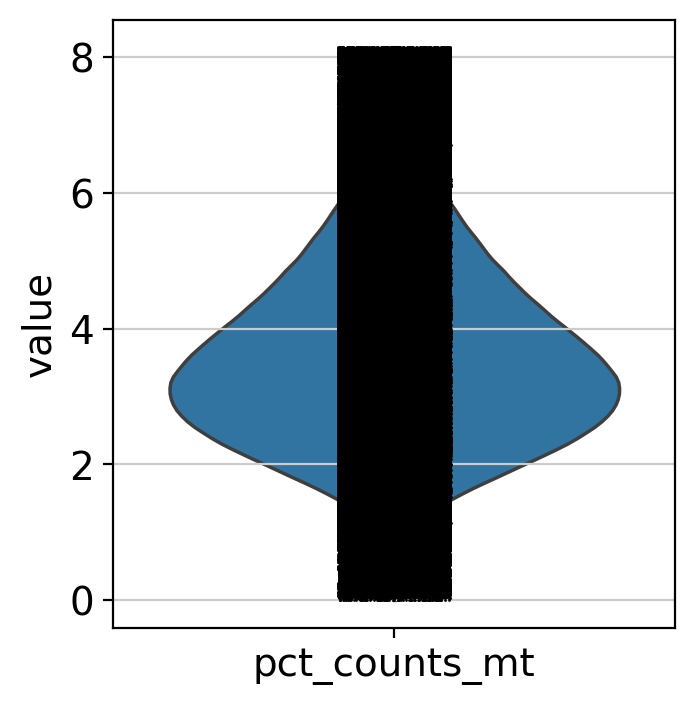

Performing doublet detection sanity check...


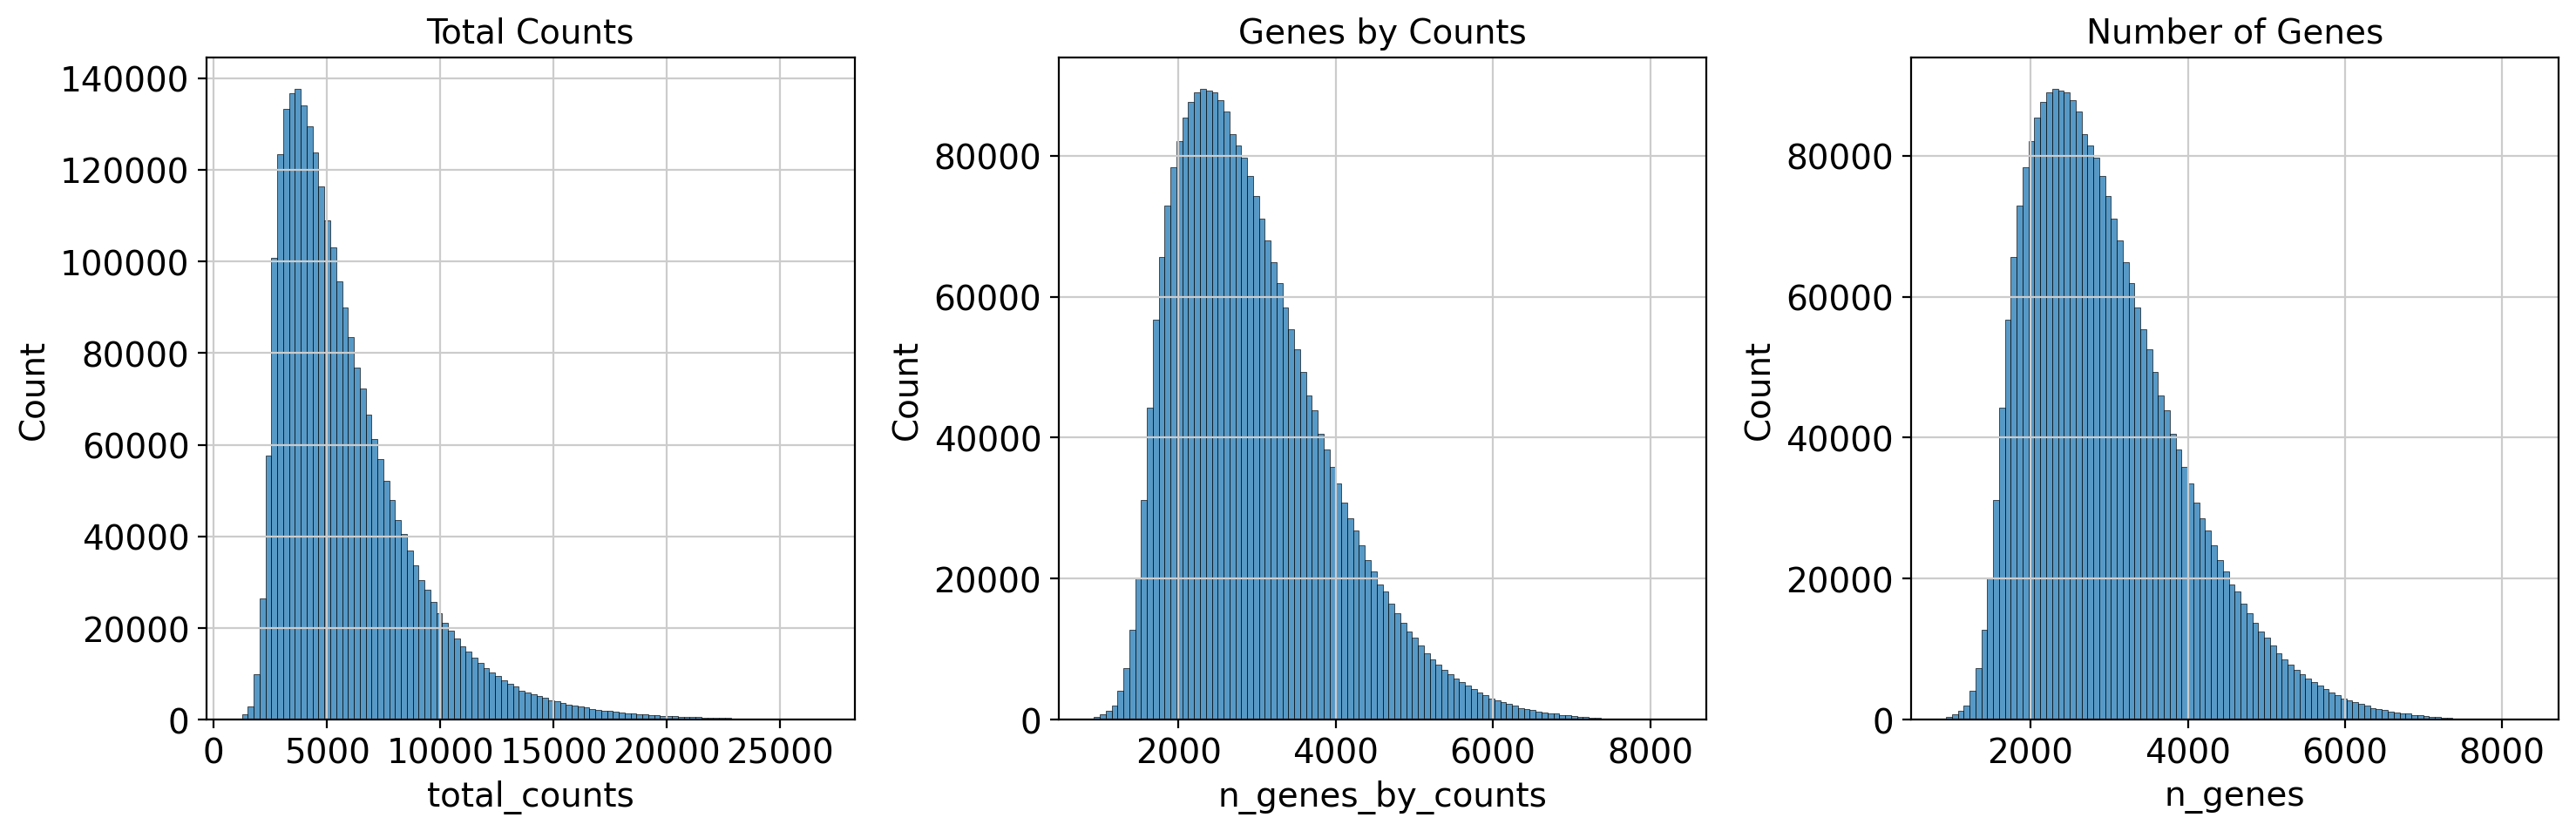

Saving final QC file to /tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/input_files/anndata_objects/KOLF_Pan_Genome_QC_Filtered.h5mu...


In [2]:
mtx_dir = "/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/input_files/anndata_objects/filtered_matrix_mex"
save_directory = "/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/input_files/anndata_objects/KOLF_Pan_Genome_Aggregate.h5mu"
protospacer_calls_file = "/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/input_files/protospacer_calls_per_cell.csv"
aggregation_csv = "/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/input_files/aggregation_csv.csv"
cell_type = "KRAB-ZIM3-dCas9 KOLF2.1J hiPSC"
perturbation_type = "CRISPRi"
pre_qc_save_path = "/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/input_files/anndata_objects/KOLF_Pan_Genome_Pre_QC.h5ad"
final_save_path = "/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/input_files/anndata_objects/KOLF_Pan_Genome_QC_Filtered.h5ad"
gene_id_filepath = "/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/input_files/gene_ids.txt"
obs_key = "gene_target_ensembl_id"
var_key = "gene_ids"
ntc_label = "NTC"

input_dict = {
    "mtx_dir": mtx_dir,
    "save_directory": save_directory,
    "protospacer_calls_file": protospacer_calls_file,
    "aggregation_csv": aggregation_csv,
    "cell_type": cell_type,
    "perturbation_type": perturbation_type,
    "pre_qc_save_path": pre_qc_save_path,
    "final_save_path": final_save_path,
    "gene_id_filepath": gene_id_filepath,
    "obs_key": obs_key,
    "var_key": var_key,
    "ntc_label": ntc_label
}

adata = psp.qc.default_qc(input_dict)

### Scrubbing NTC Cells

Initial number of NTC Cells: 151611
Number of NTC Cells after whitelist filtering: 54986
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    343 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    258 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    with n_comps=100
    finished (0:00:46)
    and added
    'X_pca', the PCA coordinates (adata.obs)
    'PC1', 'PC2', ..., the loadings (adata.var)
    'pca_variance', 

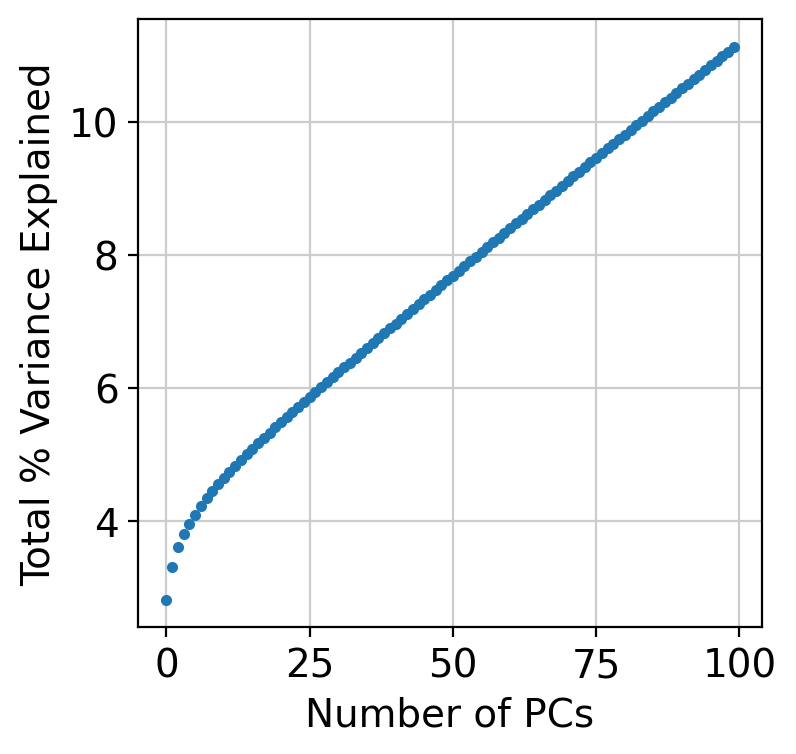

computing neighbors
    computing neighbors
    computed neighbors (0:00:22)
    computed connectivities (0:00:01)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:24)
computing UMAP


  0%|          | 0/200 [00:00<?, ?it/s]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:40)


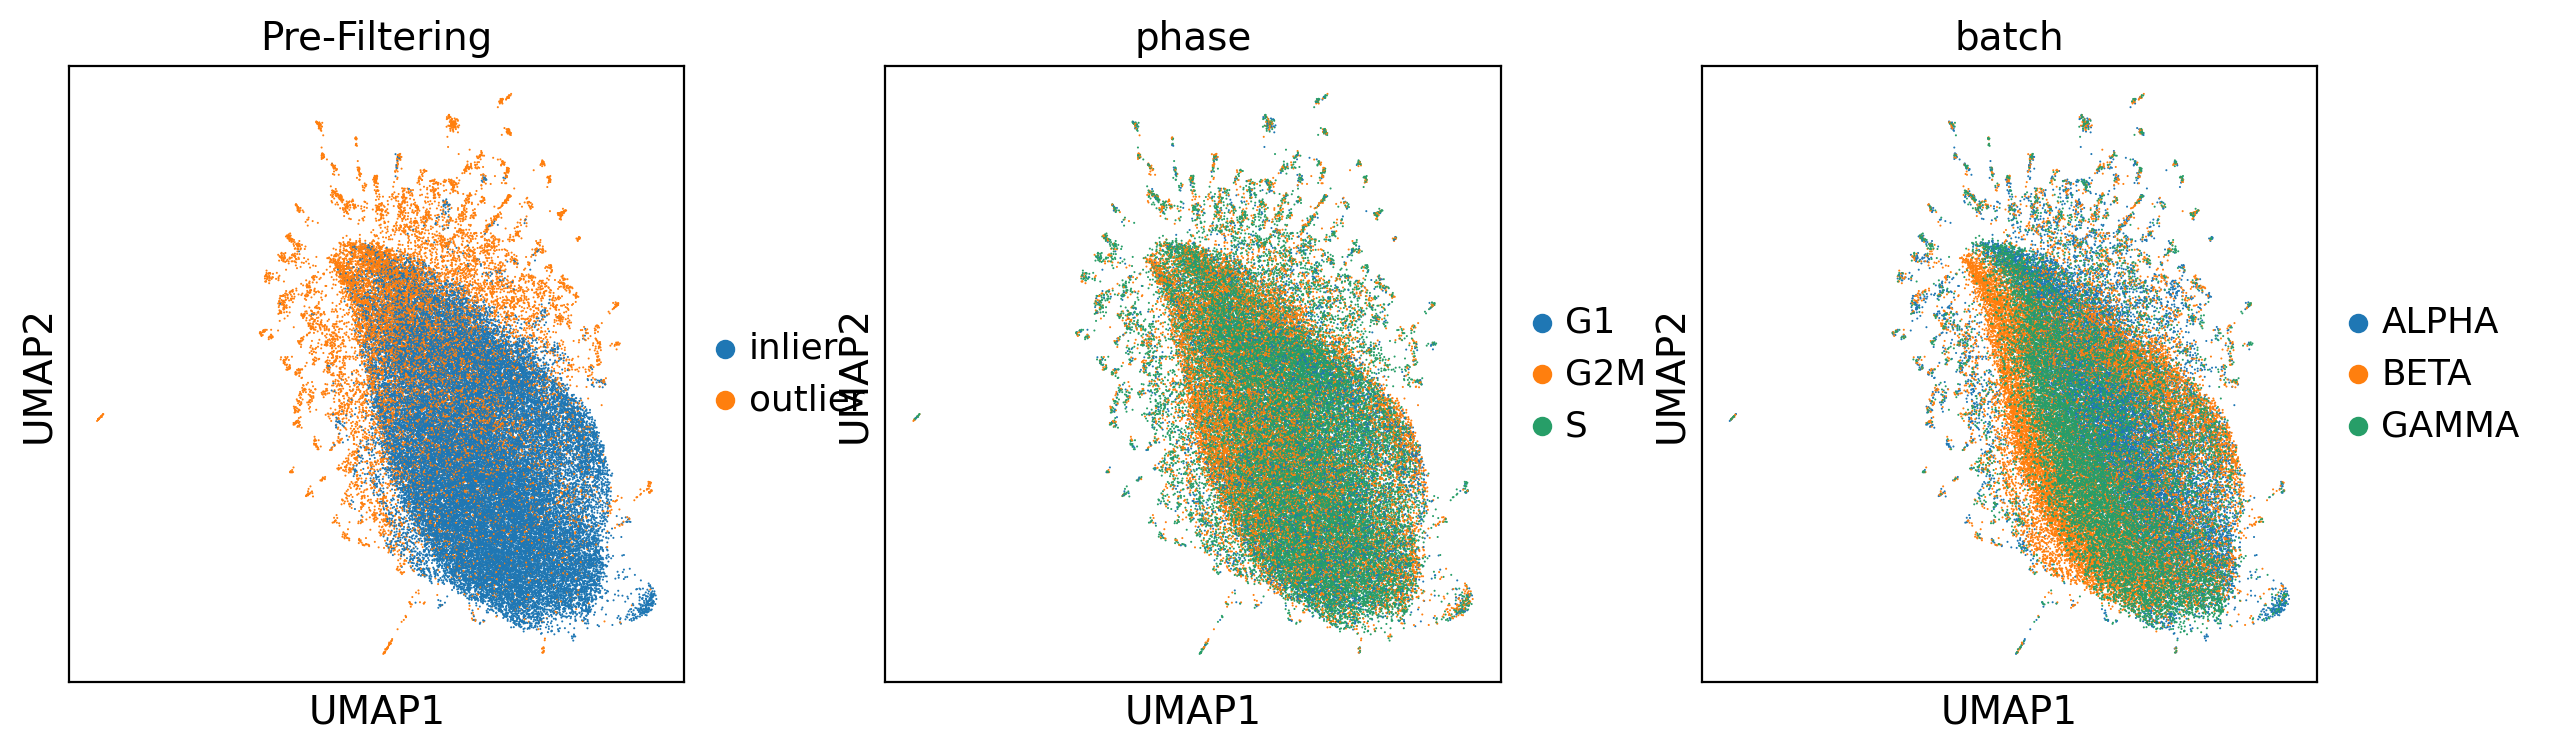

computing density on 'umap'
--> added
    'umap_density', densities (adata.obs)
    'umap_density_params', parameter (adata.uns)


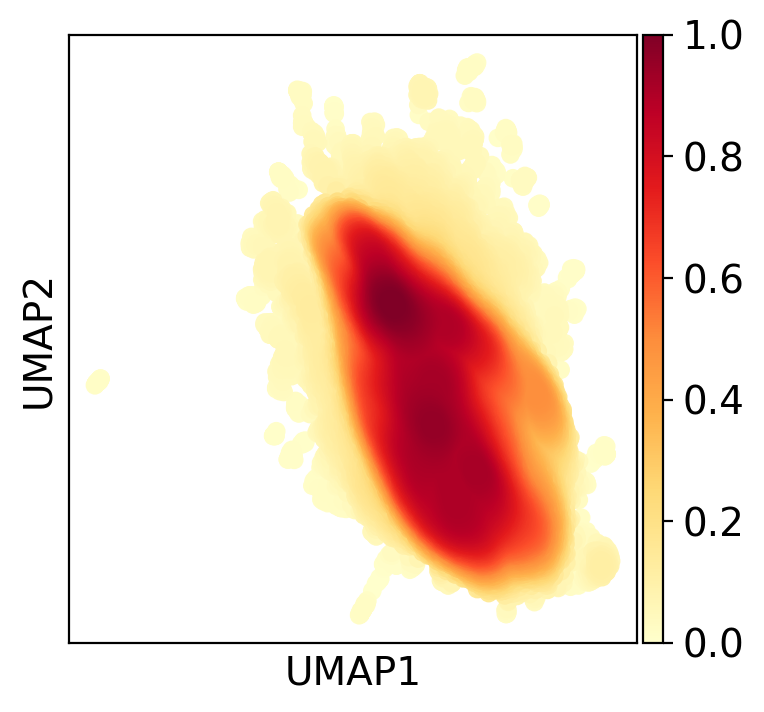

computing neighbors
        initialized `.distances` `.connectivities` 
    computing neighbors
    computed neighbors (0:00:04)
    computed connectivities (0:00:00)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:32)
computing UMAP


  0%|          | 0/200 [00:00<?, ?it/s]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:21)


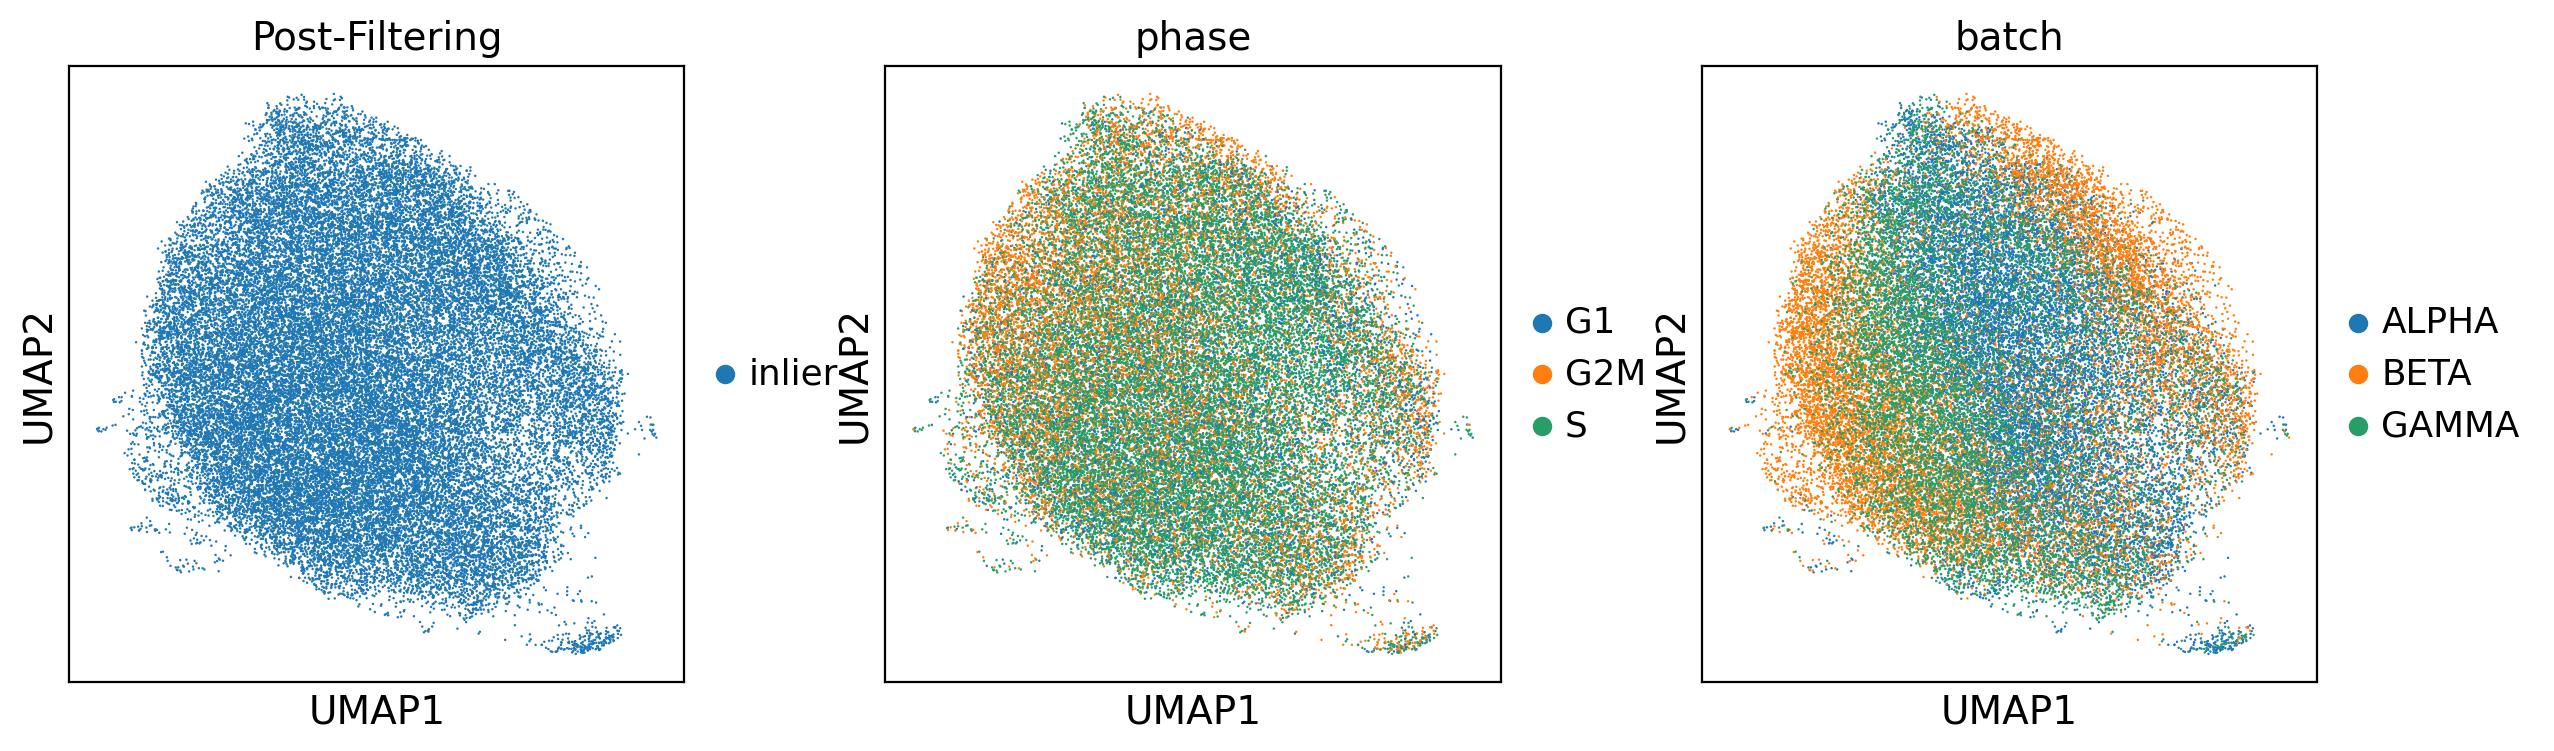

computing density on 'umap'
--> added
    'umap_density', densities (adata.obs)
    'umap_density_params', parameter (adata.uns)


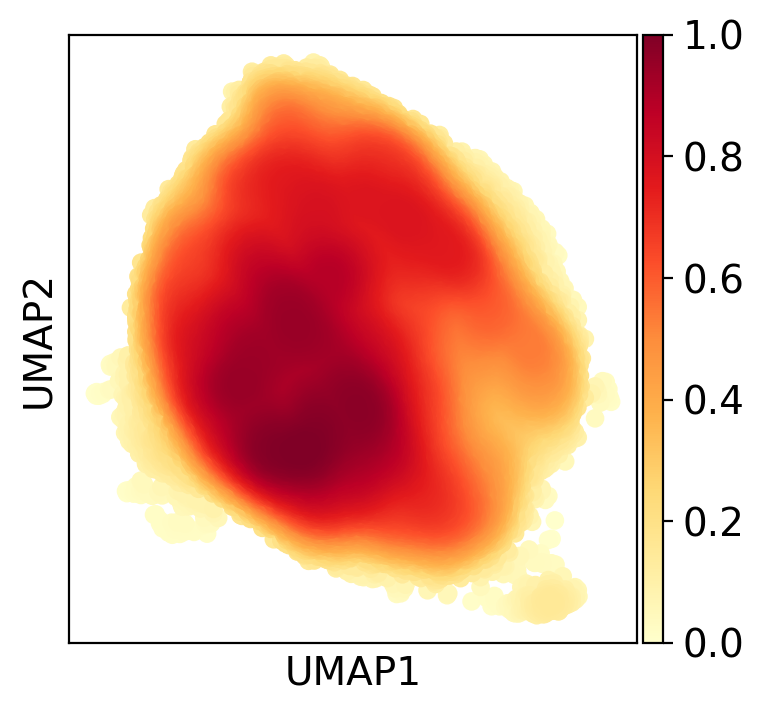

Number of NTC Cells after Isolation Forest filtering: 38490
Total number of cells after NTC cleaning: 2622329
Number of NTC Cells per batch: batch
BETA     979843
ALPHA    946100
GAMMA    696386
Name: count, dtype: int64


In [2]:
adata_filepath = "/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/input_files/anndata_objects/KOLF_Pan_Genome_Pre_QC.h5ad"
NTC_whitelist_path = "/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/input_files/NTC_sgRNA_whitelist.txt"
adata = psp.utils.read_anndata(adata_filepath)
adata = psp.pp.clean_ntc_cells(adata, NTC_whitelist_path=NTC_whitelist_path)
final_save_path = "/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/input_files/anndata_objects/KOLF_Pan_Genome_NTC_Filtered.h5ad"
adata.write(final_save_path)

In [6]:
### Small bug in the above reporting of NTC cells per batch, has been fixed
psp.utils.get_ntc_view(adata).obs.batch.value_counts()

batch
ALPHA    14891
BETA     13703
GAMMA     9896
Name: count, dtype: int64

### Filtering sgRNAs that cause sufficient target gene knockdown

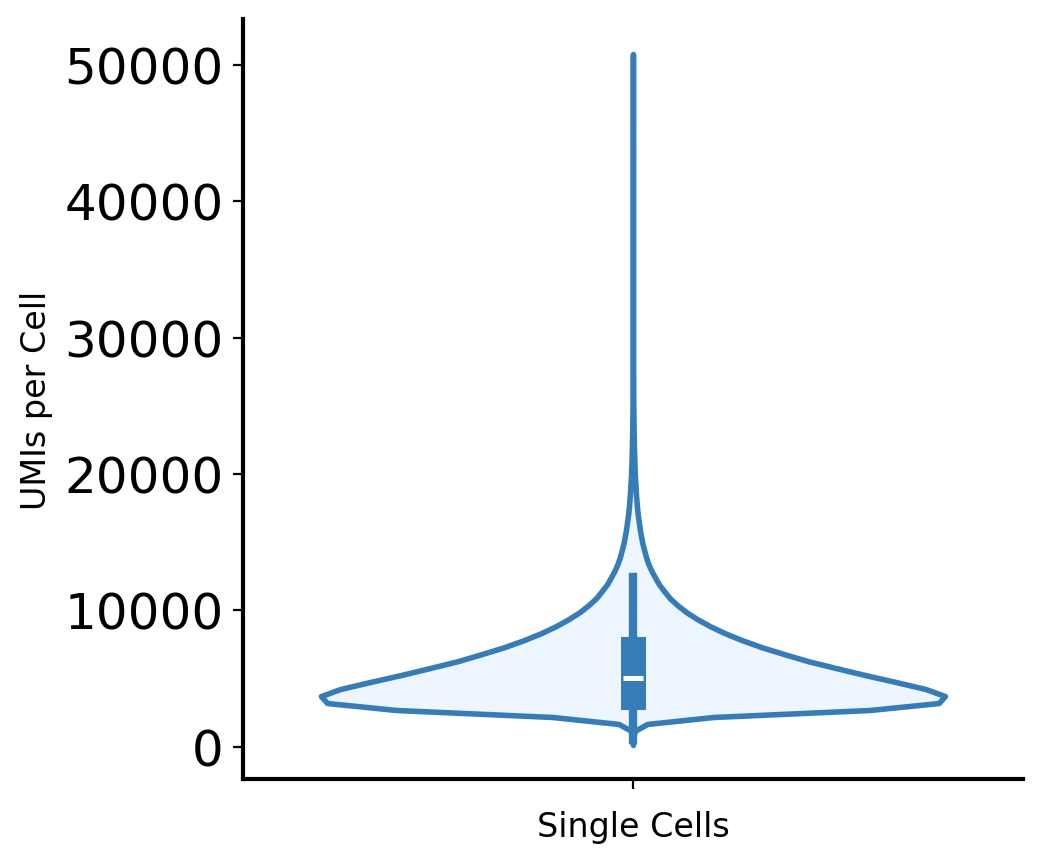

10309/11687 (88.21%) Perturbations have > 100 cells


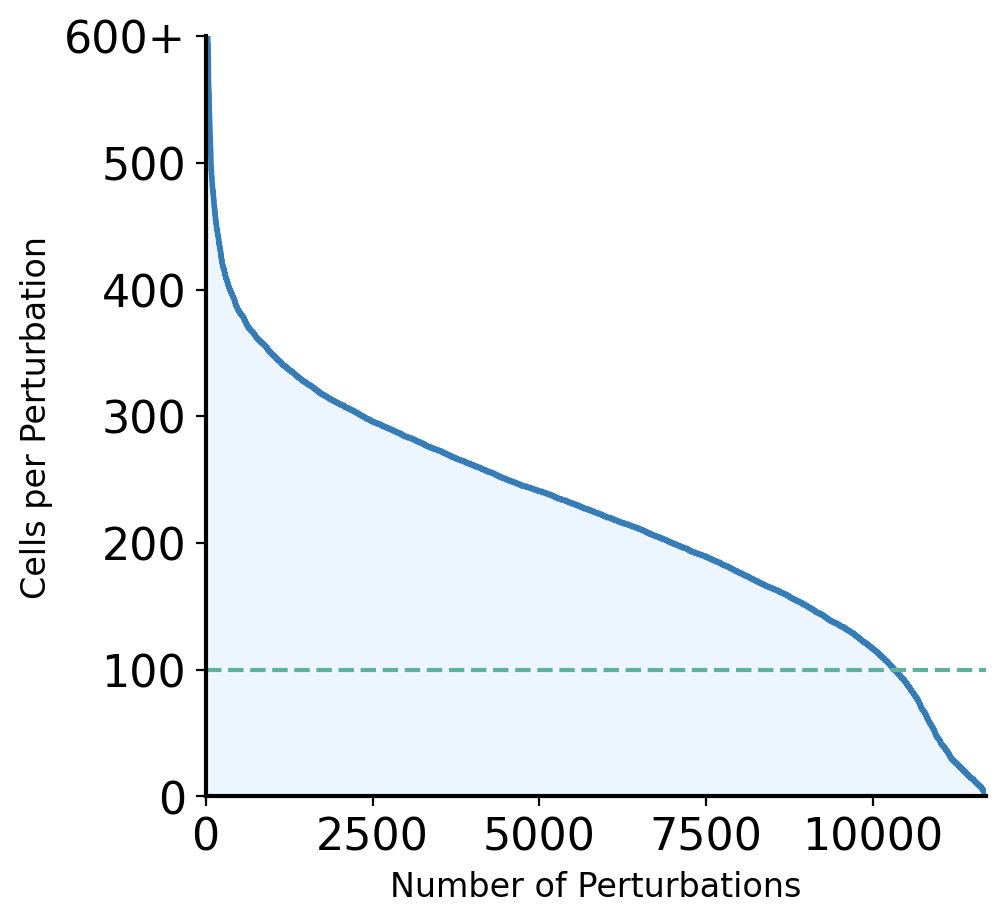

Batch-aware processing enabled
Processing batch: ALPHA
normalizing counts per cell
    finished (0:00:21)
Processing batch: BETA
normalizing counts per cell
    finished (0:00:21)
Processing batch: GAMMA
normalizing counts per cell
    finished (0:00:13)


In [3]:
data_path = "/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/input_files/anndata_objects/KOLF_Pan_Genome_NTC_Filtered.h5ad"
adata = psp.utils.read_anndata(data_path)
fig = psp.pl.plot_umis_per_cell(adata)
fig.savefig("/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/output_files/umis_per_cell.png")
fig.savefig("/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/output_files/umis_per_cell.svg")
fig = psp.pl.plot_cells_per_perturbation(adata)
fig.savefig("/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/output_files/cells_per_perturbation.png")
fig.savefig("/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/output_files/cells_per_perturbation.svg")
adata = psp.pp.knockdown_qc(adata)
fig.savefig("/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/output_files/knockdown_qc.png")
fig.savefig("/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/output_files/knockdown_qc.svg")
adata.write("/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/input_files/anndata_objects/KOLF_Pan_Genome_Knockdown_Evaluated.h5ad")

/tscc/nfs/home/ydoctor/miniconda3/envs/perturb_seq_env/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3579: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


Percentage of perturbations achieving 30.0% repression: 81.04% (9513/11739)


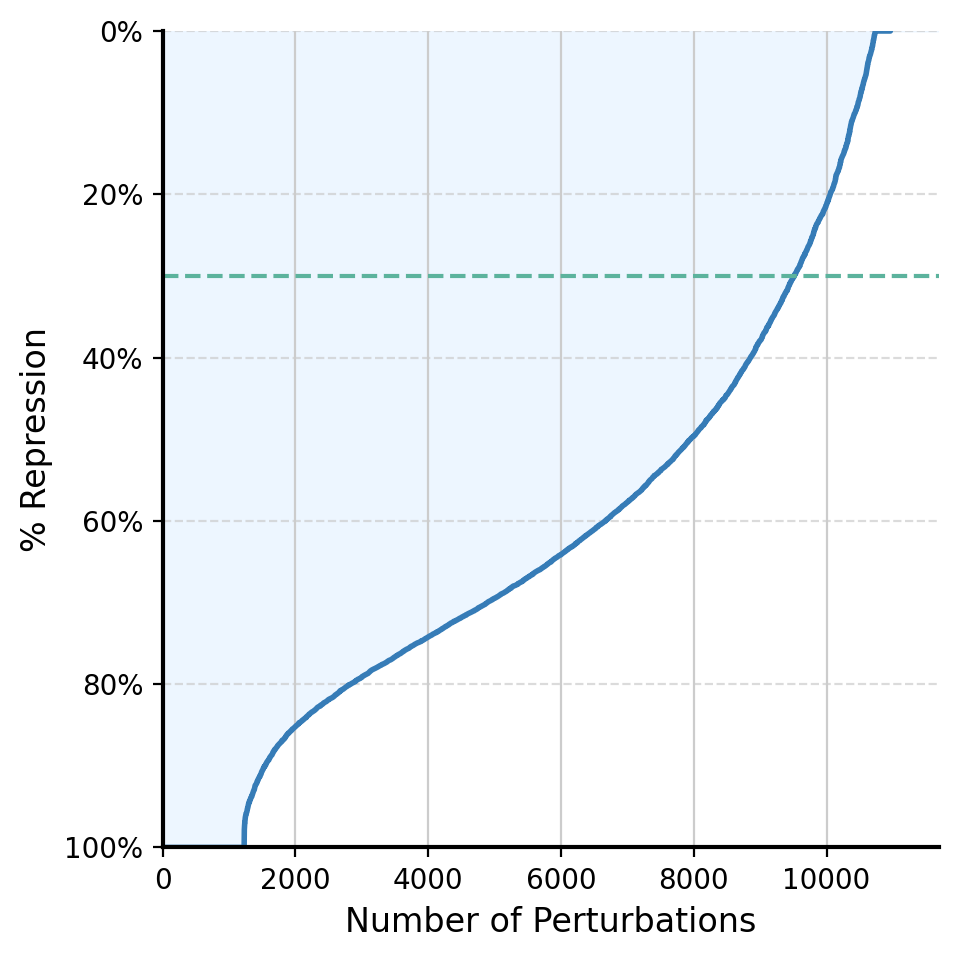

In [19]:
fig = psp.pl.plot_percentage_perturbations_by_repression(adata, total_perturbations=11739)
fig.savefig("/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/output_files/sgRNA_knockdown.png")
fig.savefig("/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/output_files/sgRNA_knockdown.svg")

Processing batch: ALPHA


/tmp/ipykernel_2244228/2827556018.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


Processing batch: BETA


/tmp/ipykernel_2244228/2827556018.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


Processing batch: GAMMA


/tmp/ipykernel_2244228/2827556018.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


Removing 6908 guides due to low repression
Removing 114550 cells due to low repression
Removing 3180 guides due to low cell count per guide


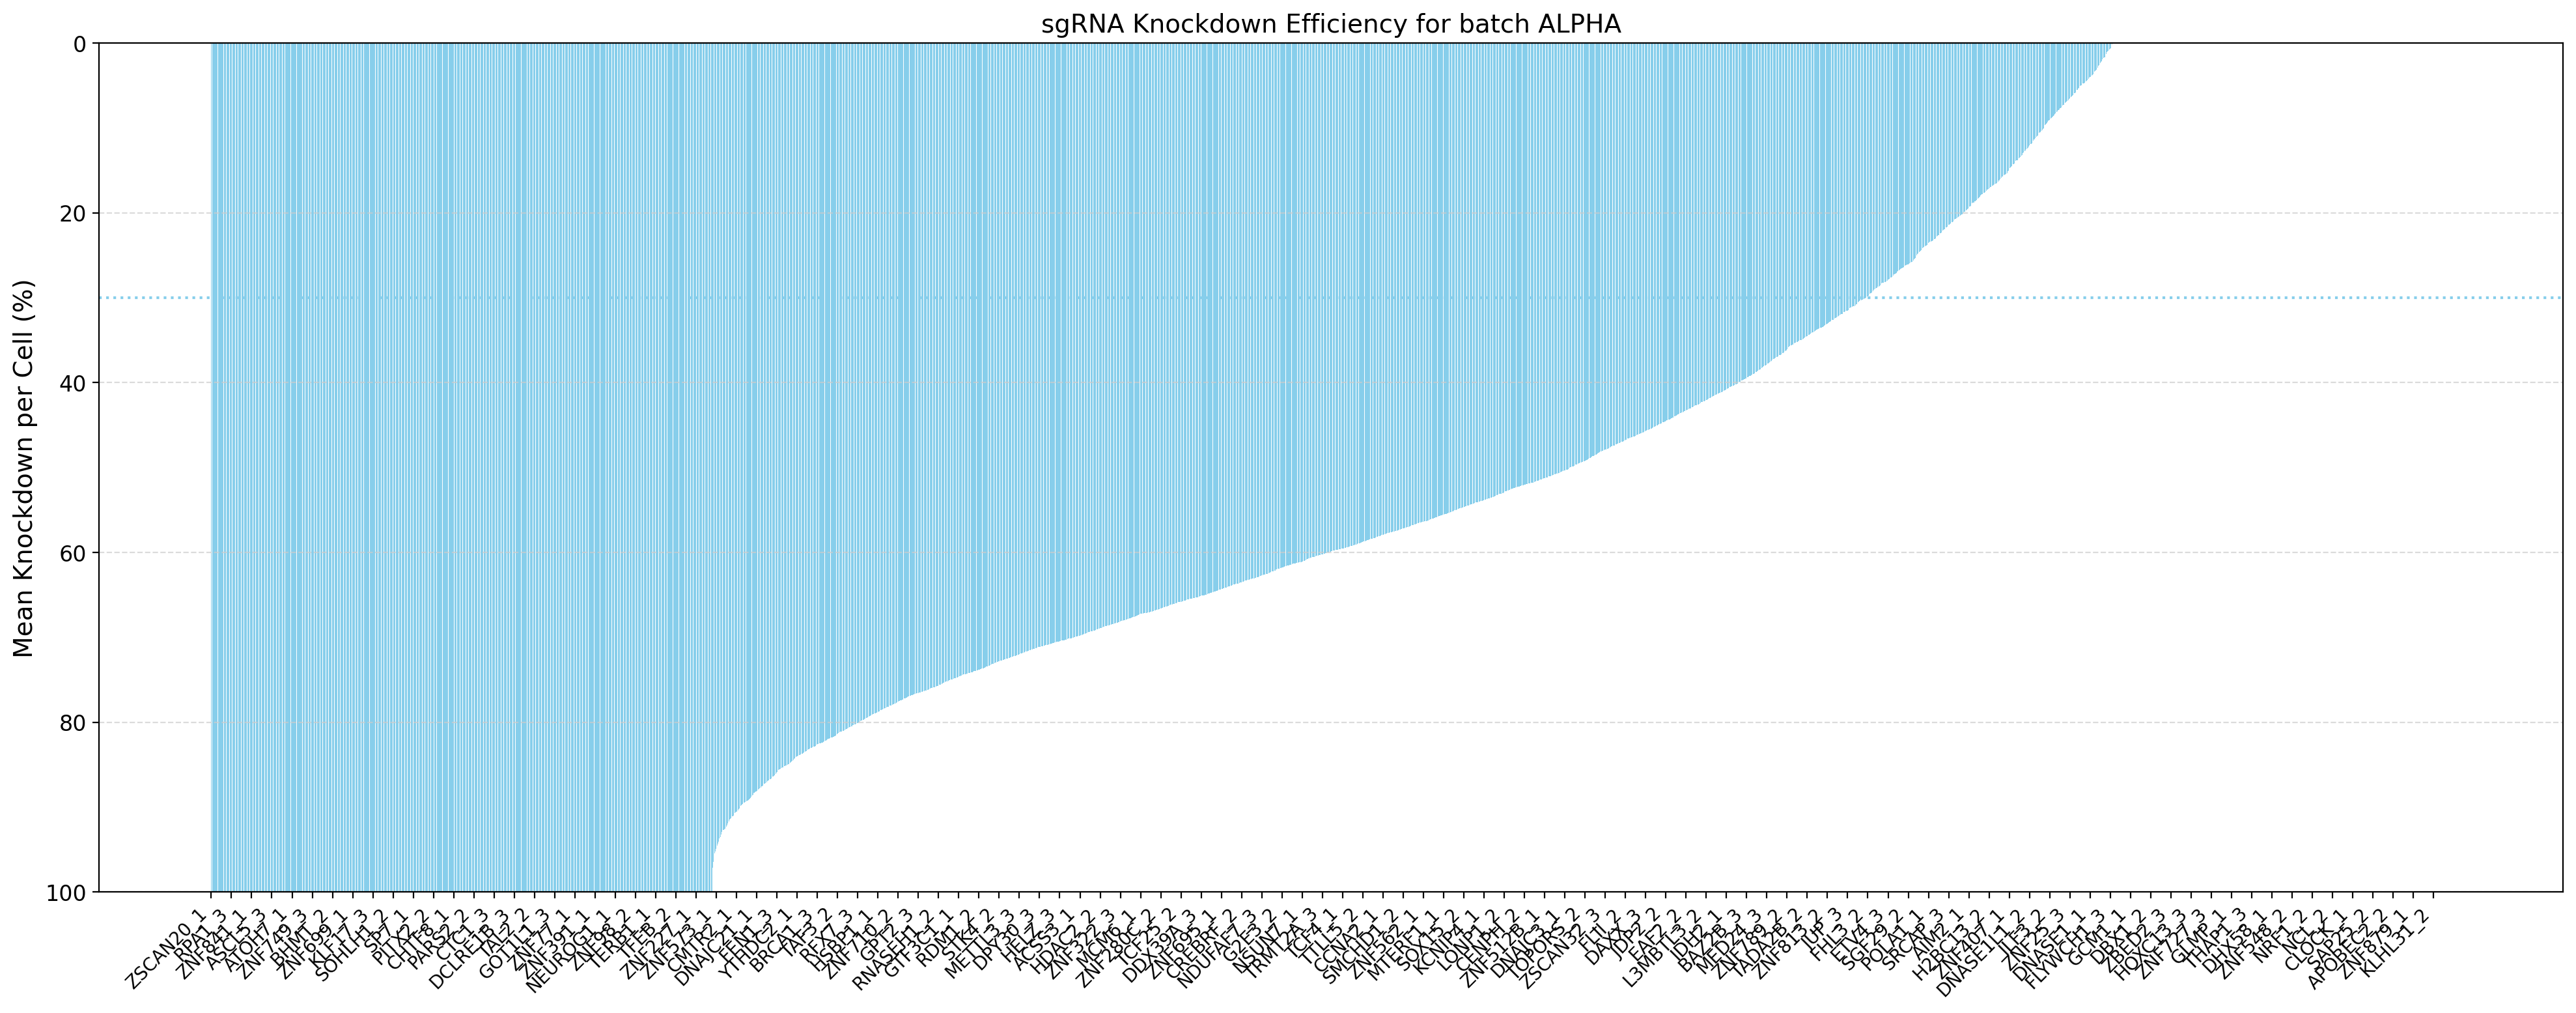

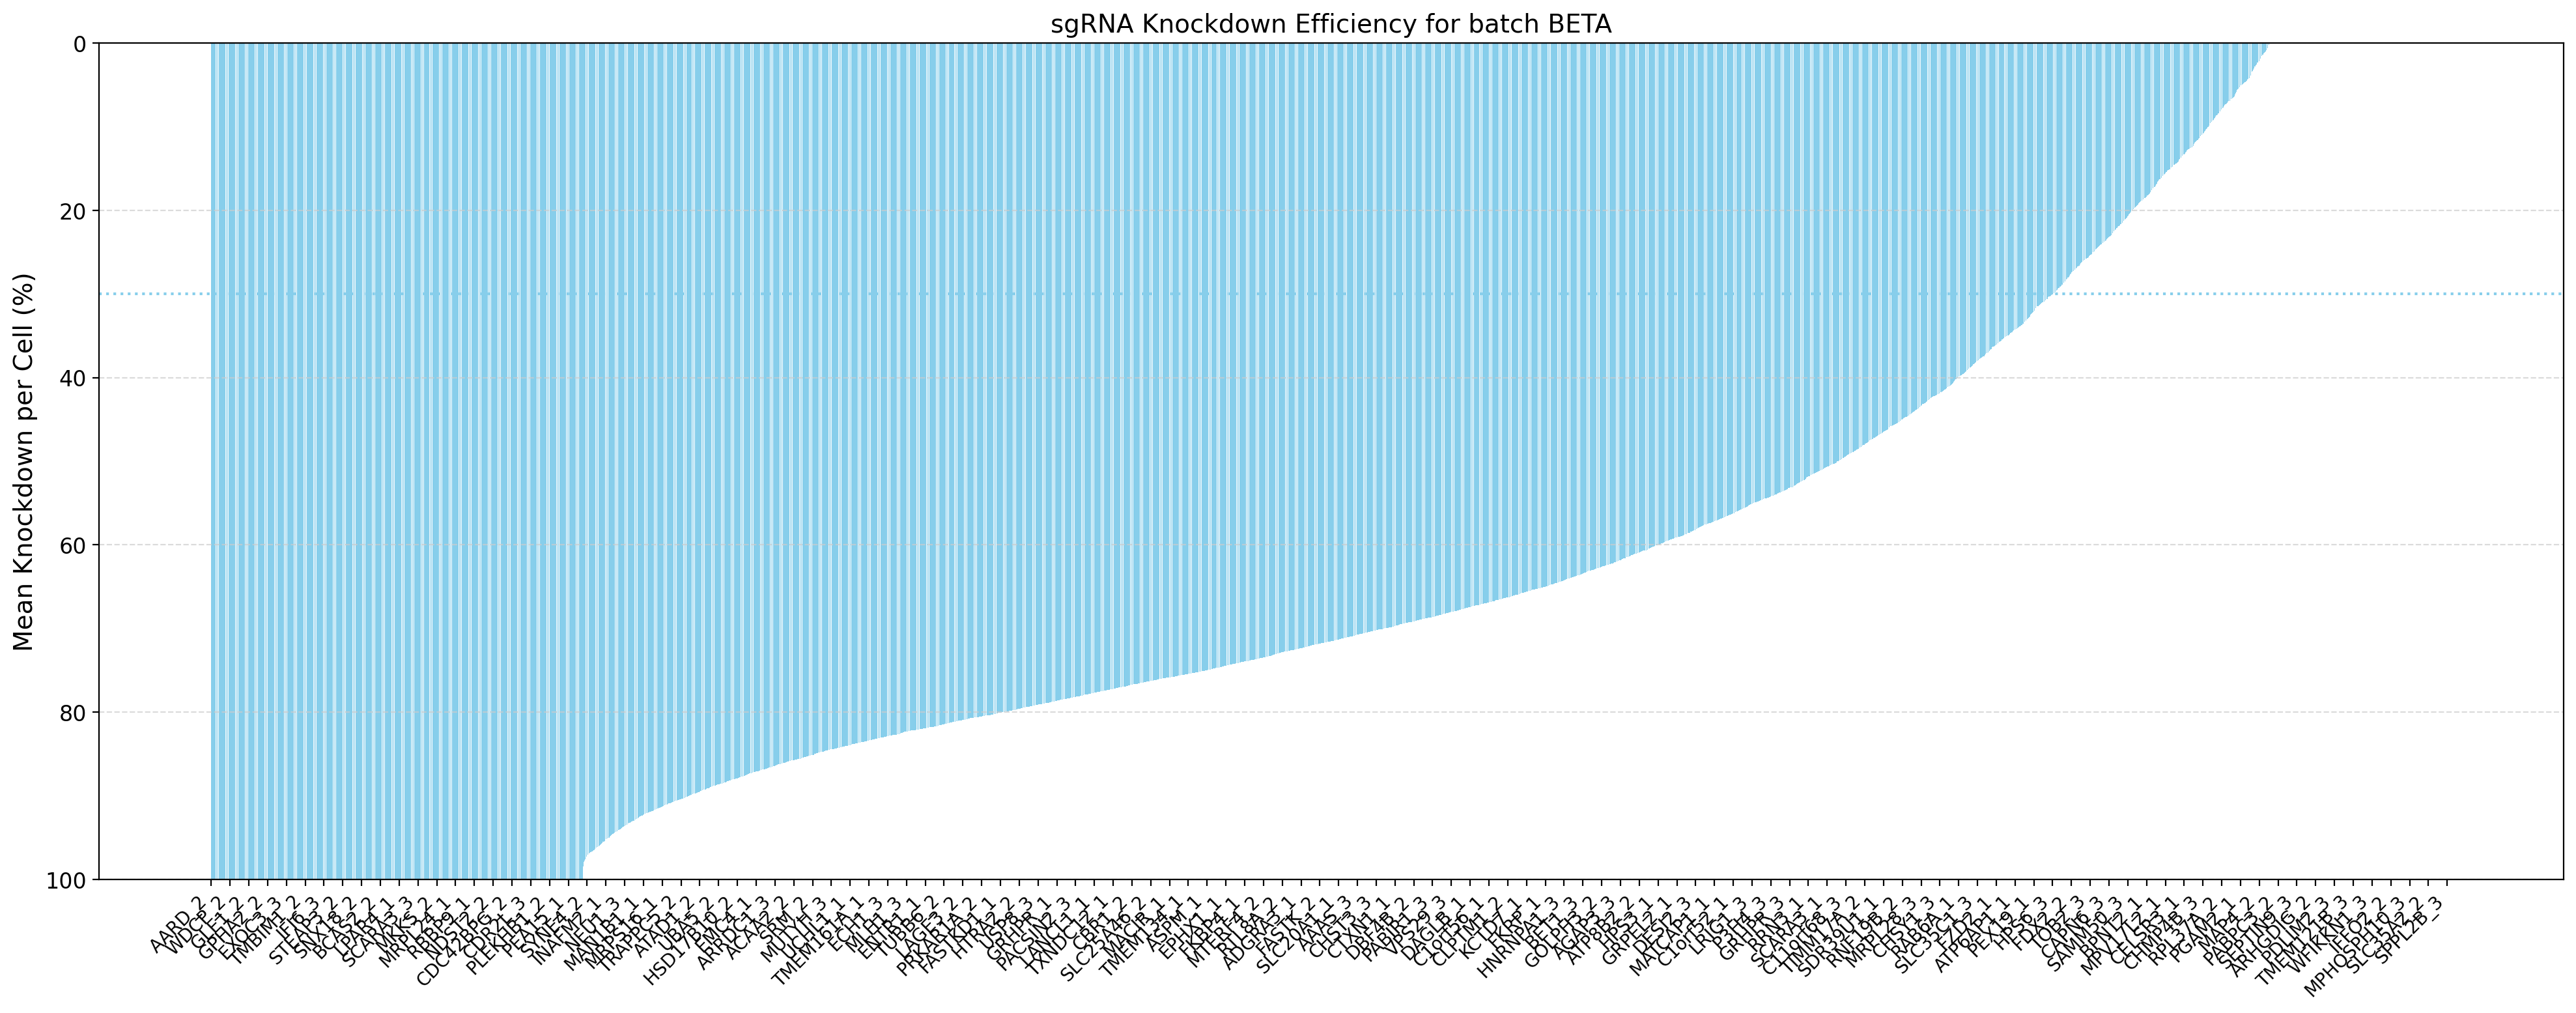

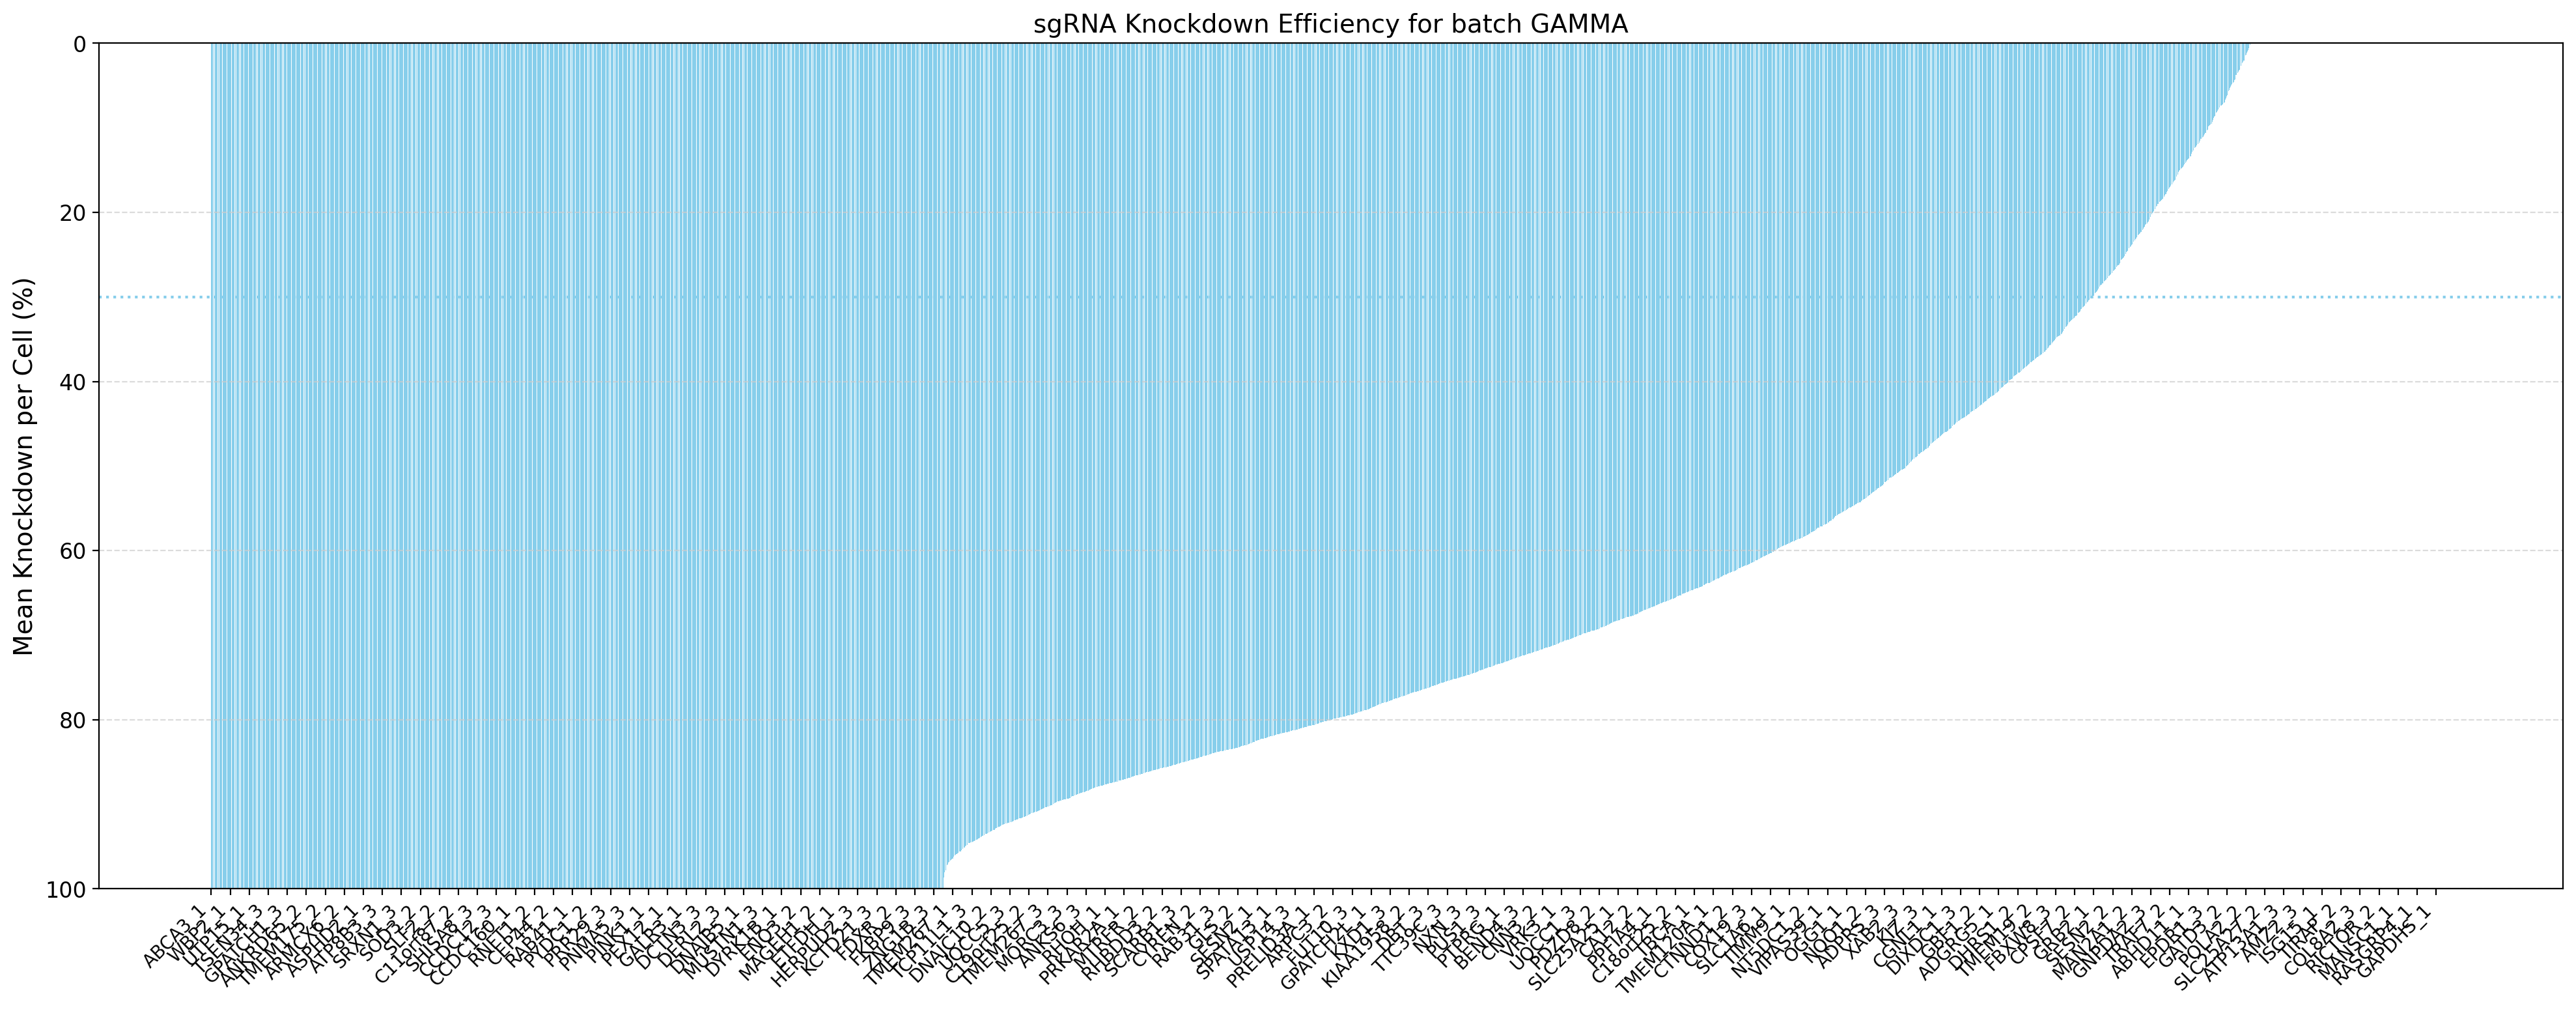

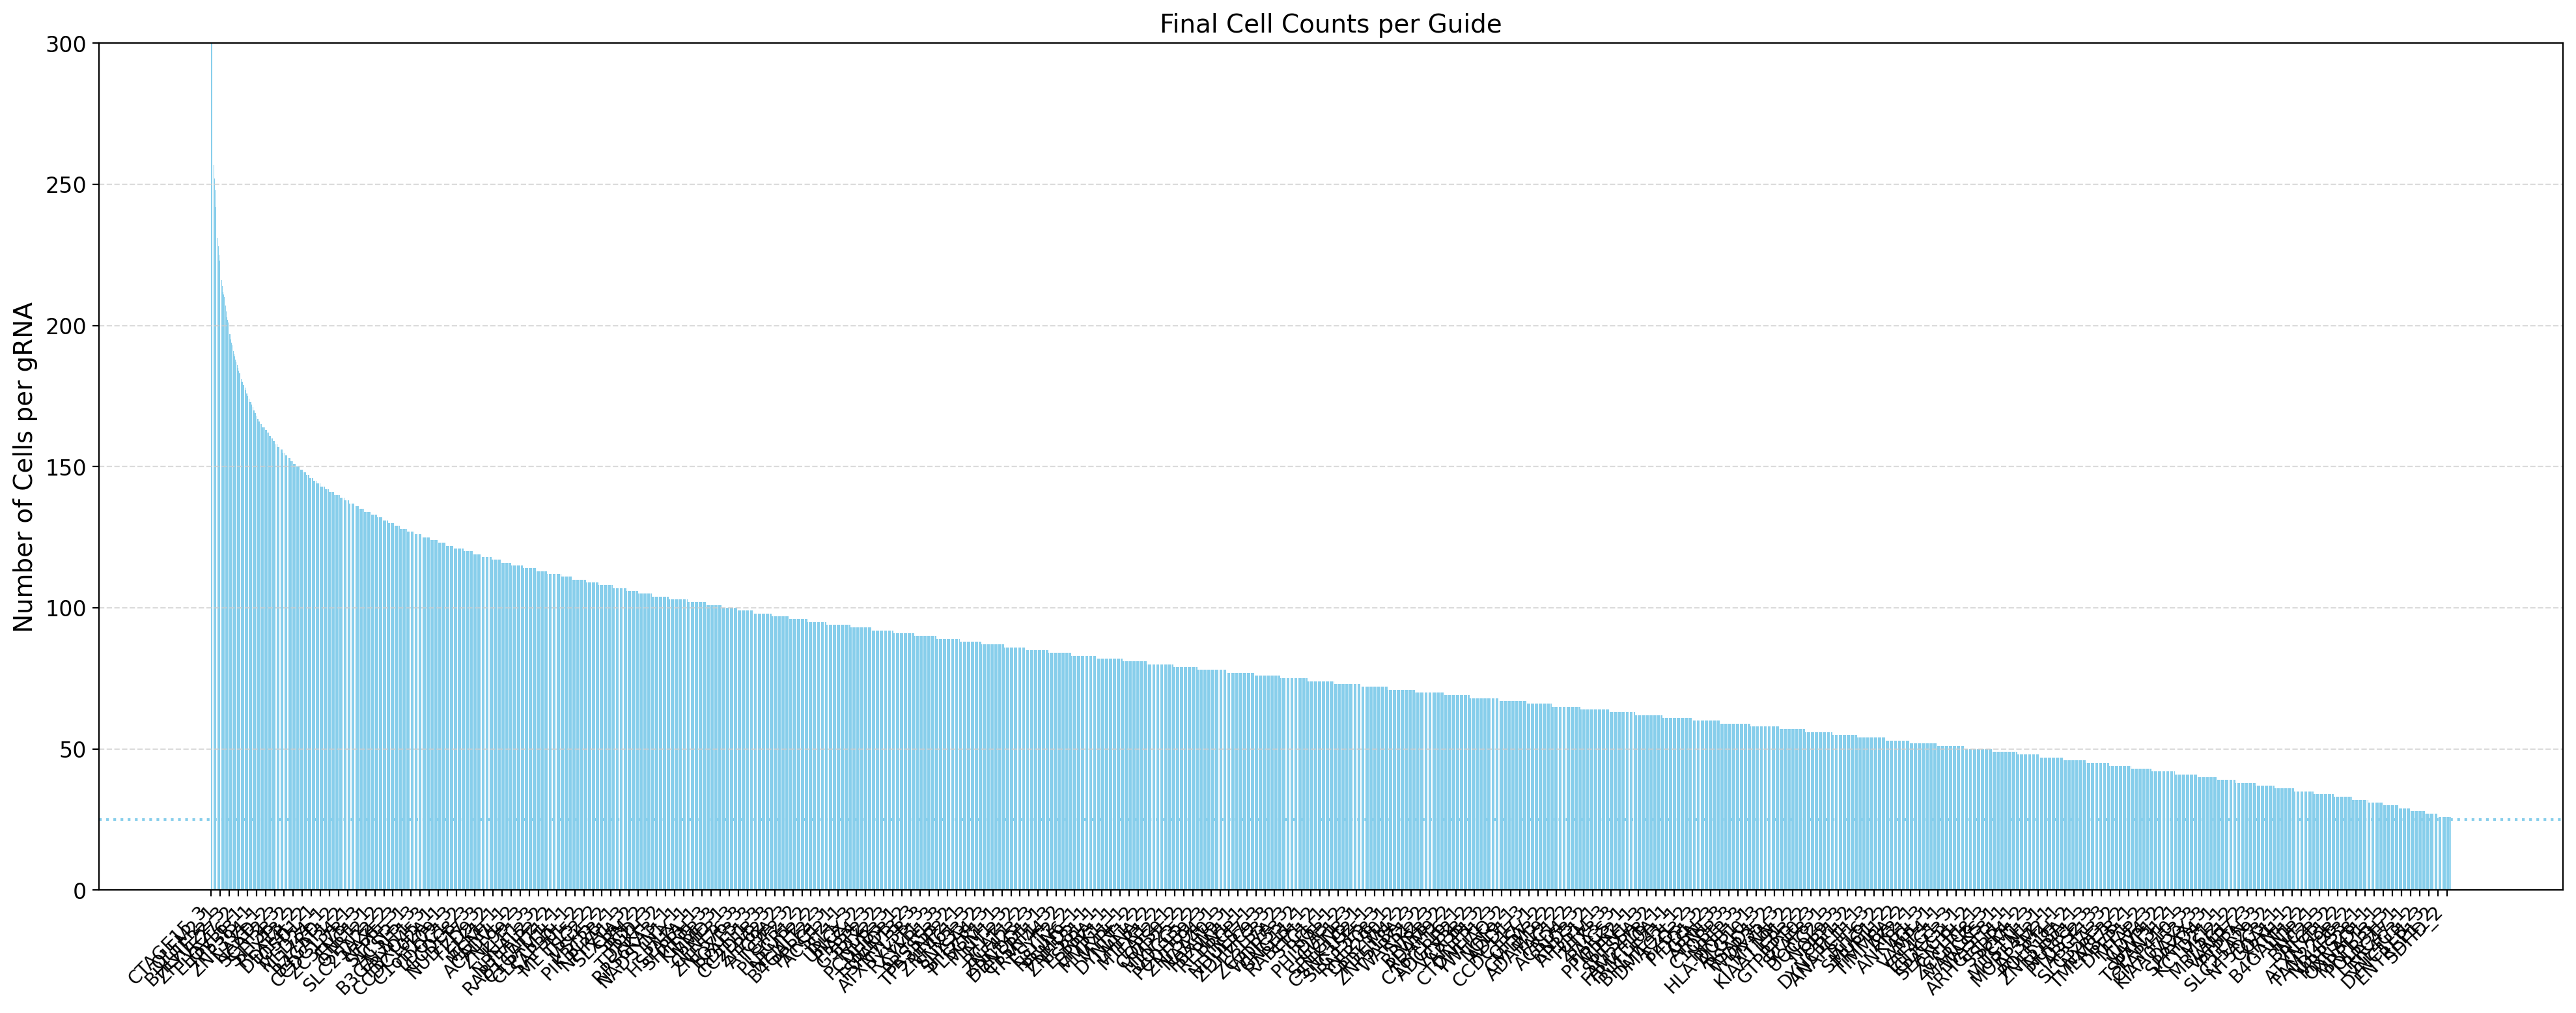

In [ ]:
adata = psp.pp.evaluate_per_sgRNA_knockdown(adata)
adata.write("/tscc/projects/ps-malilab/ydoctor/KOLF_Perturbation_Atlas/KOLF_Perturbation_Atlas_Analysis/input_files/anndata_objects/KOLF_Pan_Genome_Knockdown_Filtered.h5ad")

In [47]:
# Final statistics
print(f"Total number of cells: {adata.n_obs}")
print(f"Total number of sgRNAs: {adata.obs.gRNA.nunique()}")
print(f"Total number of perturbations: {psp.utils.get_perturbed_view(adata).obs.gene_target.nunique()}") #This is after knockdown filtering, so before we under-estmate this value by taking the mean of all sgRNA before evaluatiion
print(f"Mean number of cells per perturbation: {psp.utils.get_perturbed_view(adata).obs.gene_target.value_counts().mean()}")

Total number of cells: 1983553
Total number of sgRNAs: 24882
Total number of perturbations: 10166
Mean number of cells per perturbation: 191.3302183749754
